# RFM clustering using K-Means

* How are distributed the values ?
* Scaling/Centering of the values

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

rfmsppl = pd.read_csv("./../../../output/rfmsppl.csv")
rfmsppl.drop(columns=["first_order", "last_order"], inplace=True)
rfmsppl.customer_zip_code_prefix = rfmsppl.customer_zip_code_prefix.astype("object")
y = rfmsppl["review_score"]

X_train, X_test, y_train, y_test = train_test_split(
    rfmsppl, y, test_size=0.2, random_state=42, stratify=y
)
rfmsppl = X_test

rfmsppl

,recency,frequency,monetary,nb_orders,days_between_orders,scoring_R,scoring_F,scoring_M,scoring_RFM,segment_RFM,review_score,review_completion_percentage,review_behavior,nb_products,customer_zip_code_prefix,customer_city,customer_state
86359,147.0,0.166667,143.56,1.0,0,4,4,4,12,Bons clients,5.0,33.333333,Best Contributor,3,6315,carapicuiba,SP
42247,174.0,0.142857,159.03,1.0,0,4,3,4,11,Bons clients,3.0,66.666667,Best Contributor,1,7841,franco da rocha,SP
70502,114.0,0.200000,701.66,1.0,0,4,4,5,13,Très bons clients,5.0,100.000000,Best Contributor,1,18045,sorocaba,SP
1832,167.0,0.142857,184.56,1.0,0,4,3,4,11,Bons clients,1.0,66.666667,Best Contributor,1,23071,rio de janeiro,RJ
18729,583.0,0.050000,91.07,1.0,0,1,1,3,5,Clients tièdes,4.0,66.666667,Best Contributor,1,38735,cruzeiro da fortaleza,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36084,67.0,0.333333,84.87,1.0,0,5,5,2,12,Bons clients,5.0,66.666667,Best Contributor,1,66030,belem,PA
6,132.0,0.200000,35.38,1.0,0,4,4,1,9,Bons clients,4.0,33.333333,Best Contributor,1,13084,campinas,SP
50280,220.0,0.125000,116.85,1.0,0,3,3,3,9,Bons clients,5.0,33.333333,Best Contributor,1,84200,jaguariaiva,PR
6970,235.0,0.111111,464.05,1.0,0,3,3,5,11,Bons clients,4.0,33.333333,Best Contributor,1,22750,rio de janeiro,RJ


In [2]:
rfmsppl.skew(numeric_only=True)

recency                          0.443507
frequency                        2.730593
monetary                         6.771565
nb_orders                        5.660241
days_between_orders             12.946462
scoring_R                        0.010858
scoring_F                        0.048246
scoring_M                       -0.011176
scoring_RFM                      0.000114
review_score                    -1.482048
review_completion_percentage     0.822864
nb_products                     24.247236
dtype: float64

In [3]:
rfmsppl.describe()

,recency,frequency,monetary,nb_orders,days_between_orders,scoring_R,scoring_F,scoring_M,scoring_RFM,review_score,review_completion_percentage,nb_products
count,18622.000000,18622.000000,18622.000000,18622.000000,18622.000000,18622.000000,18622.000000,18622.000000,18622.000000,18622.000000,18622.000000,18622.000000
mean,237.549565,0.190298,164.639635,1.028568,2.412415,3.001665,2.932070,3.014606,8.948341,4.153108,50.679304,1.407958
std,152.711827,0.187781,214.095173,0.166594,23.816801,1.413662,1.382085,1.410983,3.148512,1.276682,22.666592,2.313185
min,1.000000,0.041667,13.780000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000
25%,113.000000,0.083333,63.600000,1.000000,0.000000,2.000000,2.000000,2.000000,7.000000,4.000000,33.333333,1.000000
50%,219.000000,0.125000,107.850000,1.000000,0.000000,3.000000,3.000000,3.000000,9.000000,5.000000,33.333333,1.000000
75%,346.000000,0.200000,183.287500,1.000000,0.000000,4.000000,4.000000,4.000000,11.000000,5.000000,66.666667,1.000000
max,695.000000,2.000000,6929.310000,2.000000,582.000000,5.000000,5.000000,5.000000,15.000000,5.000000,100.000000,126.000000


Sadly, and as we may expect the distribution of the satisfaction variables  really skewed.

We will probably have poor performance from KMeans

In [5]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, QuantileTransformer

column_transformer = ColumnTransformer(
    [
        (
            "one_hot",
            OneHotEncoder(),
            make_column_selector(dtype_include=["object", "category"]),
        ),
        (
            "scale",
            StandardScaler(),
            make_column_selector(dtype_exclude=["object", "category"]),
        ),
        (
            "uniform",
            QuantileTransformer(),
            make_column_selector(dtype_exclude=["object", "category"]),
        ),
    ]
)

scaled_customers = column_transformer.fit_transform(rfmsppl)

scaled_customers

<18622x10740 sparse matrix of type '<class 'numpy.float64'>'
	with 473603 stored elements in Compressed Sparse Row format>

### Evaluation of the right number of clusters

How can we evaluate the right number of clusters ? We can use the following methods:

* The elbow method ;
* The silhouette analysis ;
* The Davies Bouldin score ;

Read [This article](https://becominghuman.ai/3-minute-read-to-how-to-find-optimal-number-of-clusters-using-k-means-algorithm-eaa6bdce92cc) for additional information.

#### Elbow Method

Elbow method gives us an idea on what a good _k_ number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters' centroids.

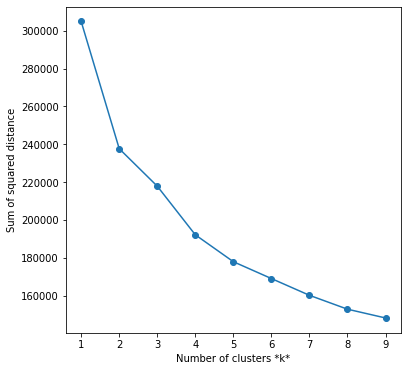

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_customers)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, "-o")
plt.xlabel(r"Number of clusters *k*")
plt.ylabel("Sum of squared distance");

The graph above shows that `k = 4` is a good choice. Sometimes it’s still hard to figure out a good number of clusters to use because the curve is monotonically decreasing and may not show any elbow or has an obvious point where the curve starts flattening out.

#### Silhouette Analysis

The **silhouette** analysis is used to evaluate the degree of separation between the clusters.
What we want is all points of a cluster as close as possible and the distance between the clusters as big as possible !

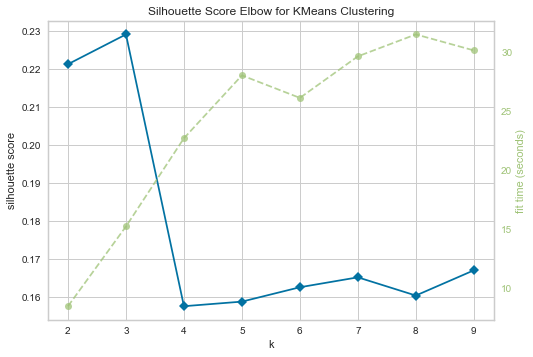

In [7]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(
    kmeans, k=(2, 10), metric="silhouette", locate_elbow=False
)
# Fit the data and visualize
visualizer.fit(scaled_customers)
visualizer.show();

From the silhouette score, it confirms that `k = 4` is an optimal choice.

#### Davies-Bouldin Index

It is defined as a ratio between the cluster scatter and the cluster’s separation.
Basically a ratio of within-cluster distance and between cluster distances. Aim is to find optimal value in which clusters are less dispersed internally and are farther apart from each other (i.e. distance between two clusters is high).
Hence, a lower value of Davies-Bouldin index will mean that the clustering is better.


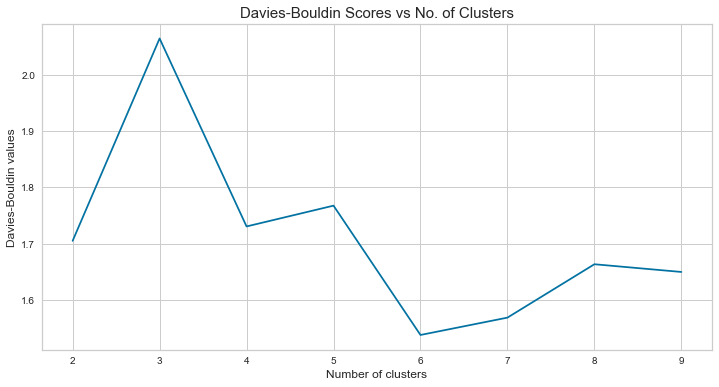

In [10]:
from sklearn.metrics import davies_bouldin_score

db_scores = {}

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_customers)
    labels = kmeans.labels_
    db_scores[k] = davies_bouldin_score(scaled_customers.toarray(), labels)

# Plotting Davies-Bouldin Scores
plt.figure(figsize=(12, 6))
plt.plot(list(db_scores.keys()), list(db_scores.values()))
plt.xlabel("Number of clusters", fontsize=12)
plt.ylabel("Davies-Bouldin values", fontsize=12)
plt.title("Davies-Bouldin Scores vs No. of Clusters", fontsize=15)
plt.show()

The analysis of the Davies-Bouldin Scores versus the number of clusters also indicates in favor of **4 clusters** !

Let's plot our clusters and display the silhouette plot for theses :

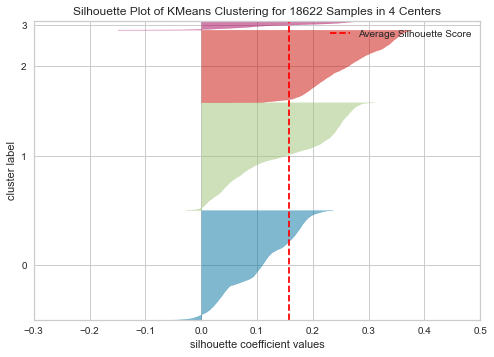

In [11]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans = KMeans(4, random_state=42)

s_visualizer = SilhouetteVisualizer(kmeans, colors="yellowbrick")
s_visualizer.fit(scaled_customers)
s_visualizer.show();

#### Projection on two dimensions

Using t-SNE reduction method, let's project our clustering using 2 dimensions.

In [ ]:
from sklearn.manifold import TSNE

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_customers)
clusters = kmeans.labels_

rfmsppl["cluster"] = clusters
rfmsppl.cluster = rfmsppl.cluster.astype("category")
print(rfmsppl["cluster"].value_counts())
tsne = TSNE(n_components=2, learning_rate="auto", init="random")
projected_customers = tsne.fit_transform(scaled_customers)

In [ ]:
import plotly.express as px

fig = px.scatter(
    projected_customers,
    x=0,
    y=1,
    color=rfmsppl.cluster,
    labels={"color": "cluster"},
    opacity=0.8,
)
fig.show()

In [ ]:
print("END")